In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib notebook

In [3]:
#obtained from http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html
L = 1
T = 30000
dT = 2
Nx = 500
a = 0.0000001

In [4]:
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.arange(0, T, dT)    # mesh points in time
Nt = len(t)
F = a*dT/dx**2
u   = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1) 
du = np.zeros(Nx+1)
Z2tot = np.zeros((Nx, Nt))
# u at the previous time level

# Set initial condition u(x,0) = I(x)

u_1[250] = 1
u_1[150] = 0.5
u_1[450] = 1.5

In [7]:
for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        du[i] = F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
    du[0]=F*(u_1[Nx] - 2*u_1[0] + u_1[1])
    du[Nx]=F*(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])
    for i in range(0, Nx+1):
        u_1[i] = u_1[i] + du[i]
    #Insert boundary conditions
#     u_1[0] = 0;  u_1[Nx] = 0
    
    #save z^2 
    Z = np.diff(u_1)/dx
    Z2 = Z*Z
    Z2tot[:,n]=Z2

 

In [16]:
def odefunc(u, t):
    du = np.zeros(Nx+1)

    for n in range(0, Nt):
    # Compute u at inner mesh points
        for i in range(1, Nx):
            du[i] = F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
        du[0]=F*(u_1[Nx] - 2*u_1[0] + u_1[1])
        du[Nx]=F*(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])
        for i in range(0, Nx+1):
            u_1[i] = u_1[i] + du[i]

    return du
sol = odeint(odefunc,u_1,Nt)

In [153]:
for i in range(1,5):
    print(i)

1
2
3
4


In [28]:
plt.figure()
for i in range(0, Nt,5):
    plt.plot(x, sol[i])

<IPython.core.display.Javascript object>

IndexError: index 5 is out of bounds for axis 0 with size 1

<IPython.core.display.Javascript object>


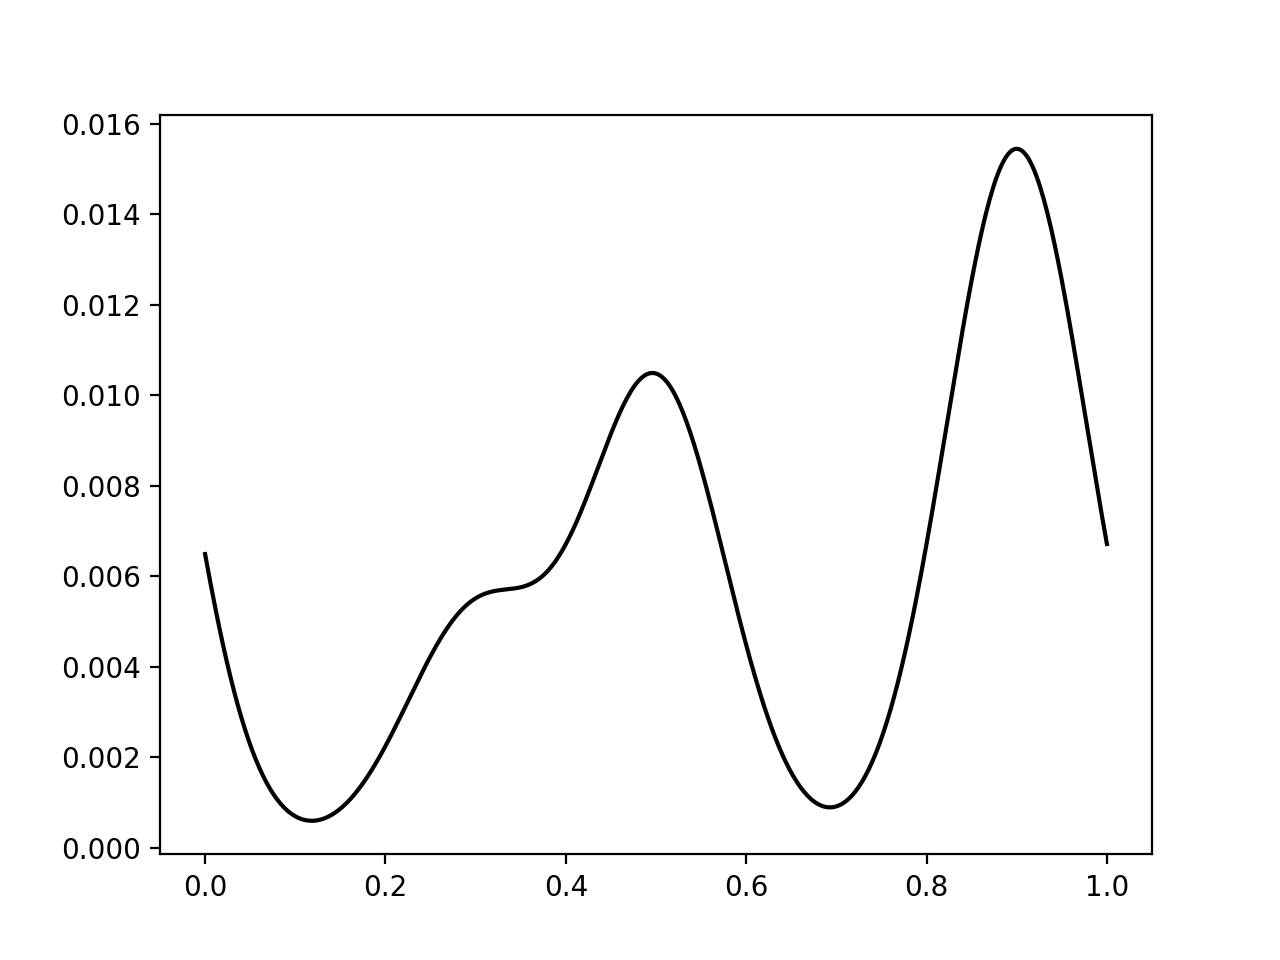

In [154]:
plt.figure()
plt.plot(x,u_1, 'k')

In [155]:
Z2totSize = np.size(Z2tot)
Z2tot_long = np.reshape(Z2tot, Z2totSize)
print(np.shape(Z2tot_long))

(7500000,)


In [156]:
# plt.figure()
# plt.plot(x[1:], Z2)
goodindicies = np.argwhere(Z2tot_long>.000001)
#Z2[goodindicies]

In [157]:
#goodindicies

In [158]:
mybins = np.linspace(0,.004,10)
counts, bins = np.histogram(Z2tot_long[goodindicies],mybins)
print(counts)
print(bins)

[1559379  411258  294544  253681  215442  177545  156186  131452  119477]
[ 0.          0.00044444  0.00088889  0.00133333  0.00177778  0.00222222
  0.00266667  0.00311111  0.00355556  0.004     ]


<IPython.core.display.Javascript object>


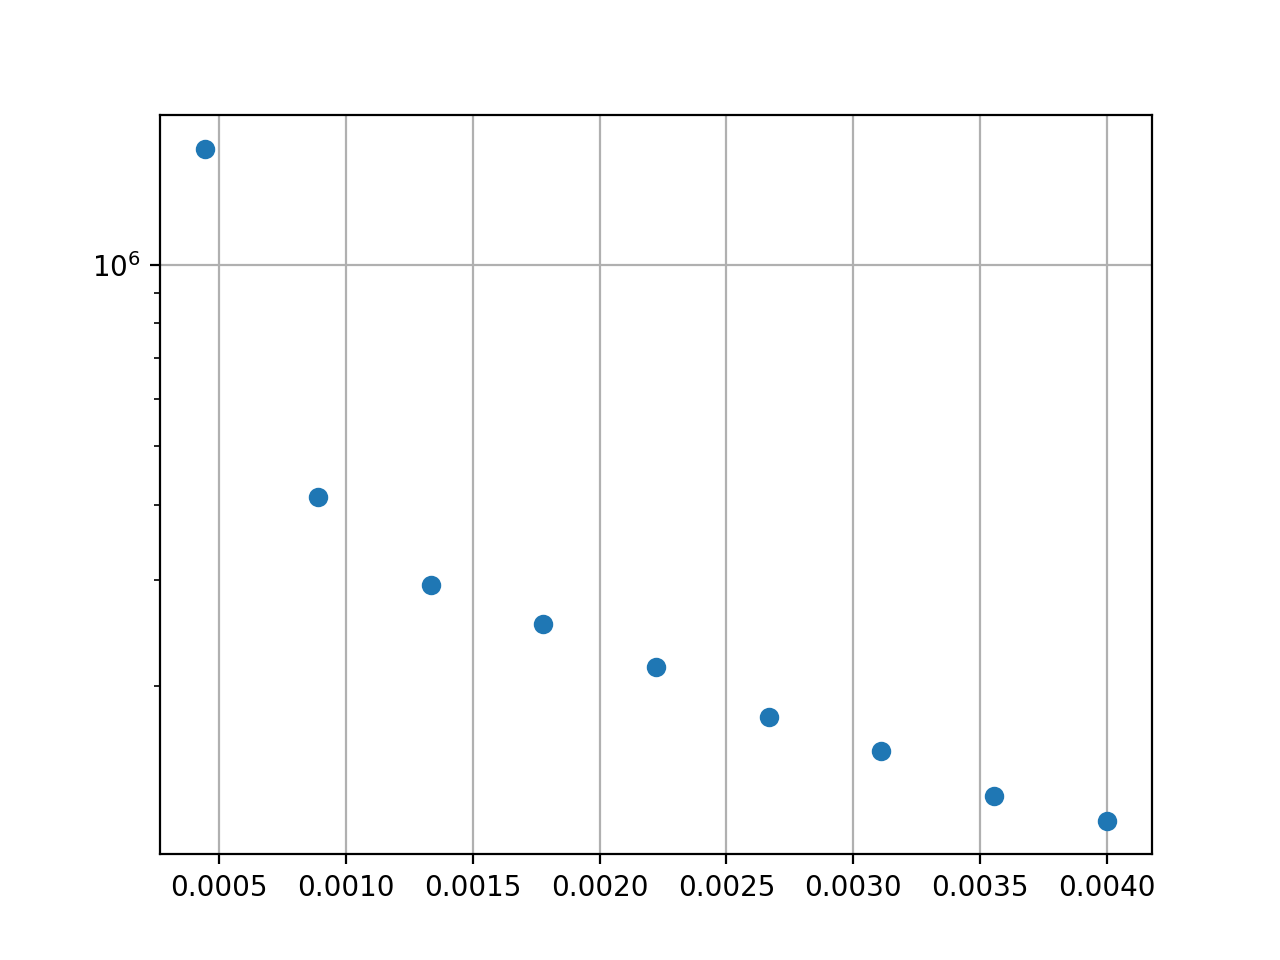

In [159]:
plt.figure()
plt.semilogy(bins[1:], counts, 'o')
plt.grid(True)